Importamos las librerias necesarias

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Importamos el dataset

In [2]:
df=pd.read_csv('/content/sample_data/Churn_Modelling.csv')
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Eliminamos las columnas que no son relevantes (Apellido, id y numero de fila)

In [3]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Cambios las variables tipo String por variables numericas categoricas (Geografía y Genero)

In [4]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Geography'] = le.fit_transform(df['Geography'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


Normalizamos los valores del dataframe

In [5]:
scaler = MinMaxScaler()

# Fit and transform the DataFrame
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# df_normalized now contains the normalized data
print(df)

      CreditScore  Geography  Gender       Age  Tenure   Balance  \
0           0.538        0.0     0.0  0.324324     0.2  0.000000   
1           0.516        1.0     0.0  0.310811     0.1  0.334031   
2           0.304        0.0     0.0  0.324324     0.8  0.636357   
3           0.698        0.0     0.0  0.283784     0.1  0.000000   
4           1.000        1.0     0.0  0.337838     0.2  0.500246   
...           ...        ...     ...       ...     ...       ...   
9995        0.842        0.0     1.0  0.283784     0.5  0.000000   
9996        0.332        0.0     1.0  0.229730     1.0  0.228657   
9997        0.718        0.0     0.0  0.243243     0.7  0.000000   
9998        0.844        0.5     1.0  0.324324     0.3  0.299226   
9999        0.884        0.0     0.0  0.135135     0.4  0.518708   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          0.000000        1.0             1.0         0.506735     1.0  
1          0.000000        0.0     

Se dividen los datos del dataframe, el set de entrenamiento contendrá el 75% de los datos y el set de validación tendrá el 25% restante

In [6]:
Datos = df.drop('Exited', axis = 1)
Objetivos = df.Exited

Datos_train, Datos_test, Objetivos_train, Objetivos_test = train_test_split(Datos, Objetivos, test_size = 0.25)

Función para construir el modelo

In [11]:
def get_Model():
  model = Sequential()
  model.add(Dense(32,activation='relu', input_shape = (10, )))
  #model.add(Dropout(rate = 0.1))
  model.add(Dense(32, activation='relu'))
  #model.add(Dropout(rate = 0.1))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

Se crea y entrena el modelo

In [12]:
model = get_Model()
model_history = model.fit(Datos_train, Objetivos_train, validation_split = 0.25, validation_data = (Datos_test, Objetivos_test), epochs = 50)

Epoch 1/50
235/235 [==============================] - 1s 2ms/step - loss: 0.5348 - accuracy: 0.7457 - val_loss: 0.4730 - val_accuracy: 0.8036
Epoch 2/50
235/235 [==============================] - 0s 2ms/step - loss: 0.4646 - accuracy: 0.7976 - val_loss: 0.4520 - val_accuracy: 0.8140
Epoch 3/50
235/235 [==============================] - 0s 2ms/step - loss: 0.4428 - accuracy: 0.8076 - val_loss: 0.4355 - val_accuracy: 0.8240
Epoch 4/50
235/235 [==============================] - 0s 2ms/step - loss: 0.4249 - accuracy: 0.8188 - val_loss: 0.4158 - val_accuracy: 0.8228
Epoch 5/50
235/235 [==============================] - 1s 2ms/step - loss: 0.4079 - accuracy: 0.8253 - val_loss: 0.3998 - val_accuracy: 0.8336
Epoch 6/50
235/235 [==============================] - 1s 2ms/step - loss: 0.3903 - accuracy: 0.8335 - val_loss: 0.3938 - val_accuracy: 0.8432
Epoch 7/50
235/235 [==============================] - 0s 1ms/step - loss: 0.3788 - accuracy: 0.8427 - val_loss: 0.3768 - val_accuracy: 0.8520
Epoch 

[0.5348024964332581, 0.46456804871559143, 0.4428209066390991, 0.4249458611011505, 0.4079360067844391, 0.3902783989906311, 0.37878623604774475, 0.3694995641708374, 0.36509186029434204, 0.36245062947273254, 0.3600371778011322, 0.3574506938457489, 0.35545122623443604, 0.35443314909935, 0.3528017997741699, 0.3512215316295624, 0.35023343563079834, 0.3492981791496277, 0.34937146306037903, 0.34688106179237366, 0.3479594588279724, 0.3454775810241699, 0.34409961104393005, 0.3448174297809601, 0.3430798053741455, 0.3423248827457428, 0.3424377739429474, 0.3408408761024475, 0.34107354283332825, 0.33945149183273315, 0.3392905592918396, 0.3390675187110901, 0.33770838379859924, 0.33796608448028564, 0.3366834223270416, 0.3369666039943695, 0.3362993896007538, 0.3350043296813965, 0.3350469172000885, 0.33314651250839233, 0.33392536640167236, 0.3334103524684906, 0.3329356908798218, 0.33297526836395264, 0.3300674259662628, 0.3310692012310028, 0.3300895392894745, 0.3299965262413025, 0.33026355504989624, 0.32

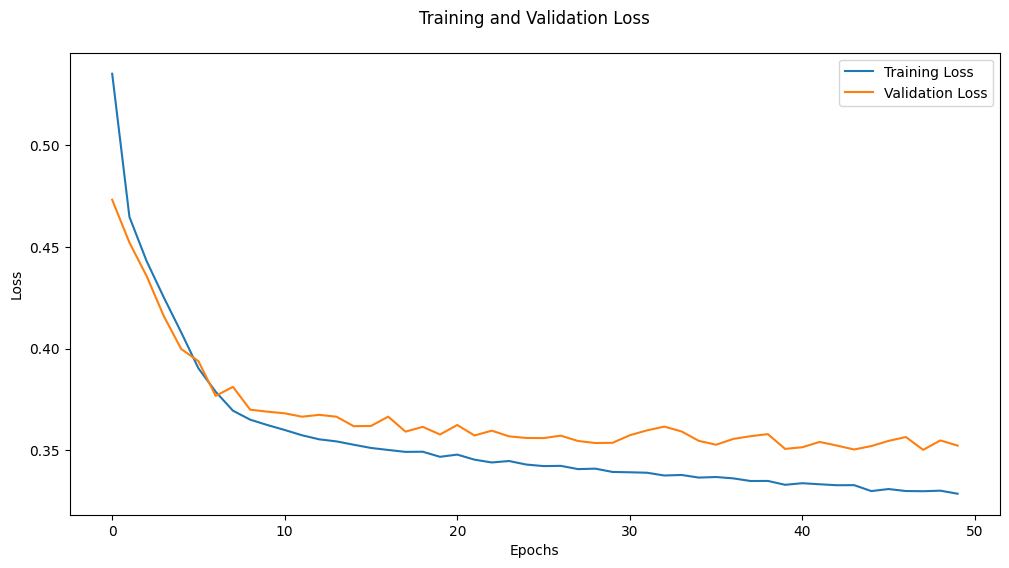

In [13]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history['loss']
print(model_history.history['loss'])
val_loss = model_history.history['val_loss']
epoch = range(1, 101)
sns.lineplot(train_loss, label = 'Training Loss')
sns.lineplot(val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

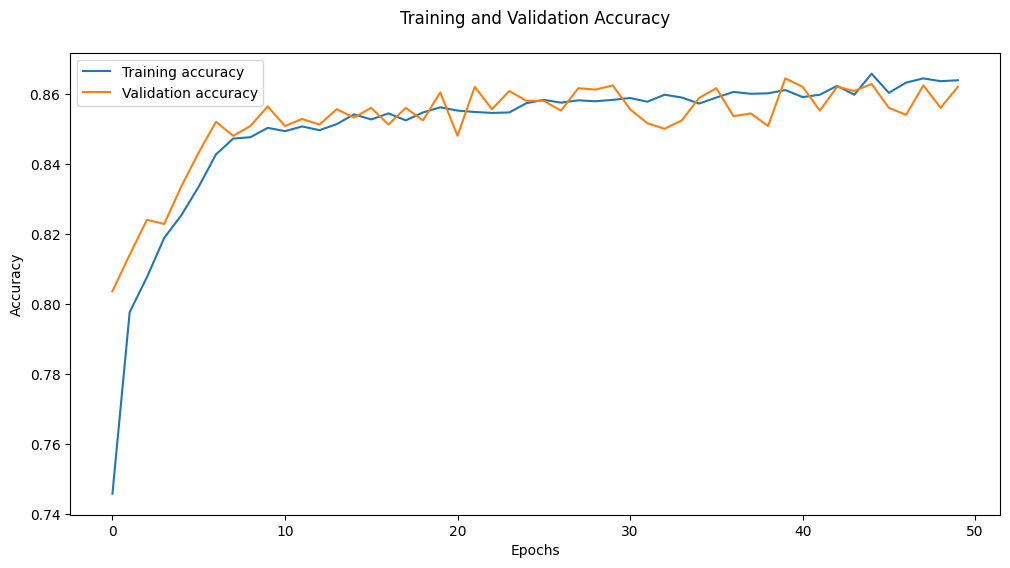

In [14]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history['accuracy']
val_loss = model_history.history['val_accuracy']
epoch = range(1, 101)
sns.lineplot(train_loss, label = 'Training accuracy')
sns.lineplot(val_loss, label = 'Validation accuracy')
plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()